Importing Required Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Loading datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#since training data set has a label column, lets drop it
y_train = df_train['label']
df_train.drop(['label'],axis=1, inplace=True)

In [6]:
#defining the test and training dataframes
#training set
x_train = df_train.to_numpy()
y_train = y_train.to_numpy()

#testing set
x_test = df_test.to_numpy()

Data Visualization

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


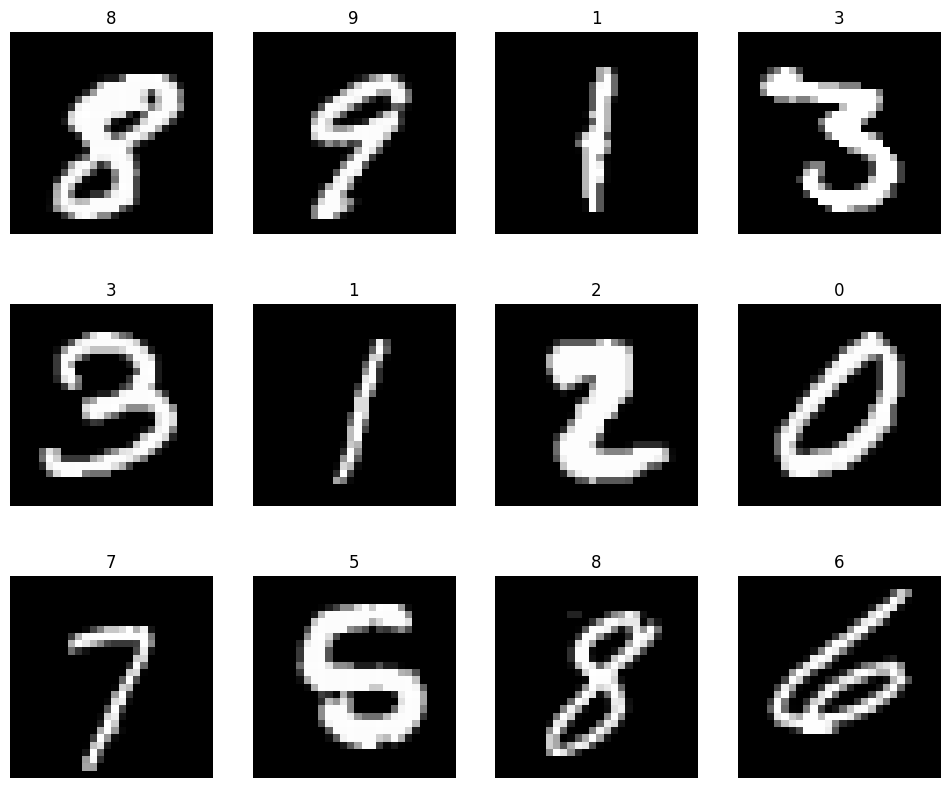

In [8]:
#lets take a look at few images along with the label
plt.figure(figsize=(12, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i + 10].reshape(28, 28), cmap='gray')  # Reshape each image to 28x28
    plt.title(y_train[i + 10])  # Show the corresponding label
    plt.axis('off')  # Turn off axis
plt.show()


**a. Briefly describe the elbow method and the silhouette method**

**Elbow Method**

The elbow approach is a technique used to ascertain the most suitable number of clusters in a dataset. The concept is founded on the notion that as the quantity of clusters rises, the dispersion within each cluster diminishes. The elbow technique graphically represents the variation (or alternative metric for assessing clustering effectiveness) in relation to the number of clusters. The inflection point on the line, where the rate of decrease abruptly changes, reveals the appropriate number of clusters. This position signifies a compromise between the decrease in variability and the rise in the quantity of clusters. The appropriate number of clusters is typically determined by identifying the point at which the rate of reduction slows down significantly, resulting in a plot that resembles the shape of a "elbow".

**Silhouette Method**

The silhouette approach is a methodology employed to assess the caliber of clusters generated by a clustering algorithm. Cohesion refers to the degree of similarity between an object and its own cluster, whereas separation refers to the degree of dissimilarity between an object and other clusters. The silhouette score is a numerical measure that falls within the range of -1 to 1. A higher value suggests that the object is well suited to its own cluster and not well suited to nearby clusters. A score around 0 signifies the presence of clusters that overlap. The silhouette score is computed for each individual sample and subsequently averaged to produce a comprehensive score for the clustering process. A higher silhouette score indicates superior clustering. The silhouette approach aids in identifying the most suitable number of clusters by evaluating silhouette scores for various cluster numbers. The ideal decision is determined by selecting the number of clusters that yields the highest average silhouette score.

**b. Mention the criteria behind the way you define number of clusters**

The principle for determining the number of clusters is the elbow approach. The elbow method is a heuristic technique employed to ascertain the most suitable number of clusters in a given dataset. The process is creating a graph that shows the number of clusters (k) plotted against a measure of clustering quality, such as the within-cluster sum of squares or inertia. The objective is to identify the point on the graph where there is a significant change in the slope, known as the "elbow" point. The elbow point signifies the point at which there is a compromise between minimizing error (or variance) and maximizing the number of clusters. The term "diminishing returns" refers to the point at which the addition of more clusters no longer leads to a meaningful improvement in the quality of clustering. Thus, the ideal value for k is frequently determined by selecting the number of clusters at the elbow point.

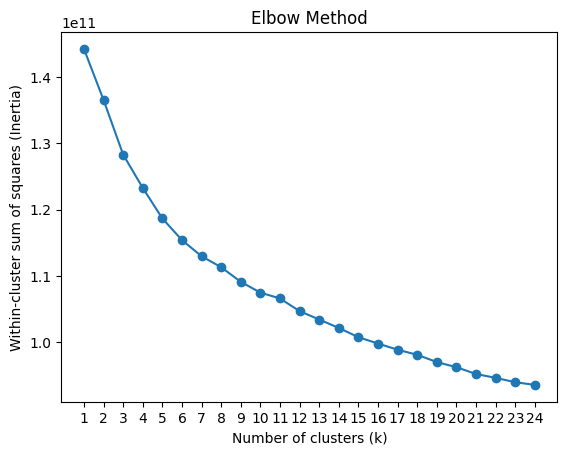

In [9]:
from sklearn.cluster import KMeans

# Define the range of k (number of clusters)
k_values = range(1, 25)  # Try different numbers of clusters from 1 to 10

# Initialize an empty list to store the within-cluster sum of squares (inertia) for each value of k
inertia_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=23)
    
    # Fit KMeans to the data
    kmeans.fit(x_train)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.xticks(k_values)
plt.show()


It can be determined from the elbow method that there are 10 clusters in the dataset, hence the KMeans algorithm from scikit-learn can be used to perform clustering.

In [10]:
#Using the KMeans Clustering
from sklearn.neighbors import KNeighborsClassifier

#making a model for the K Means Clustering 
KMeans_model = KNeighborsClassifier(n_neighbors=10)
KMeans_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

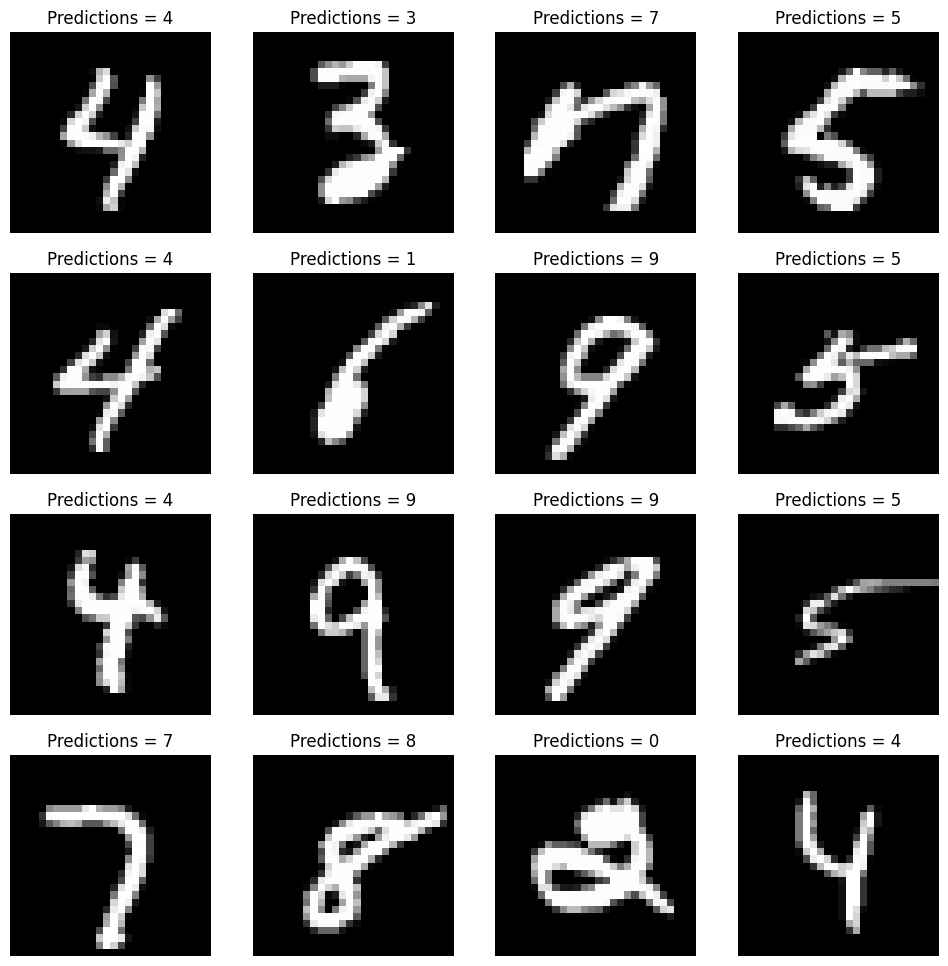

In [20]:
# Select the subset of 16 images for visualization
subset_x_test = x_test[1230:1246]

# Predict cluster labels for the subset of test images
predictions = KMeans_model.predict(subset_x_test)

# Reshape the selected images to 28x28 for visualization
images = subset_x_test.reshape(16, 28, 28)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title("Predictions = " + str(predictions[i]))
    plt.axis('off')
plt.show()

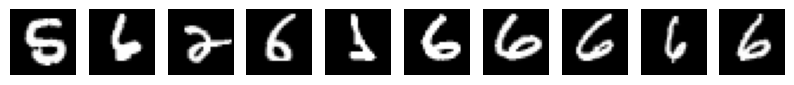

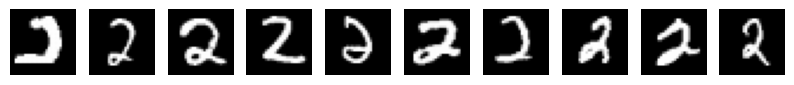

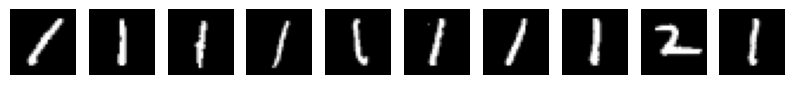

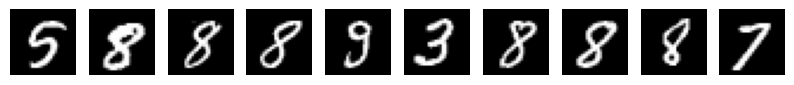

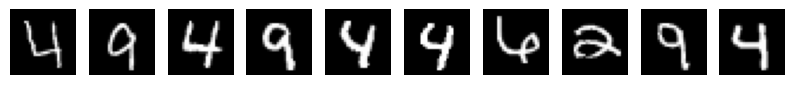

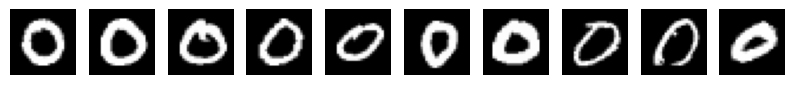

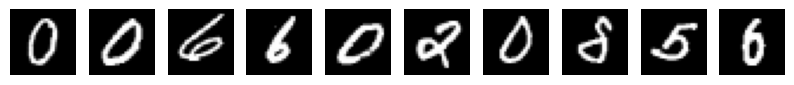

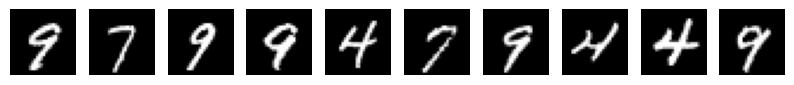

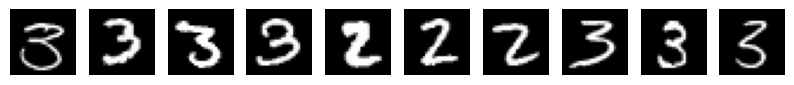

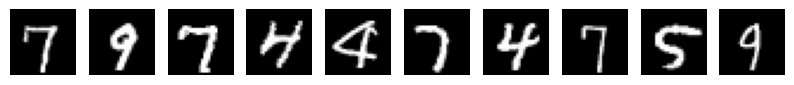

In [21]:
#making another model for clustring
KMeans_model_2 = KMeans(n_clusters=10, random_state=0).fit(x_train)

#getting the cluster
cluster_list = {i : np.where(KMeans_model_2.labels_ == i) for i in range(15)}

#visulazing each cluster
for i in range(10):
  plt.figure(figsize=(10,10))
  for j in range(min(10, len(cluster_list[i][0]))):
    plt.subplot(1,10,j+1)
    plt.imshow(x_train[cluster_list[i][0][j]].reshape(28,28), cmap='gray')
    plt.axis('off')

Misclassifications in K-means clustering of MNIST images occur because the algorithm groups images based on pixel similarity, causing different digits with similar pixel patterns to be assigned to the same cluster. The centroid, representing an average of all images in a cluster, may not distinctly represent any single digit, leading to overlaps. Additionally, the high dimensionality of the data (784 pixels) makes distance measures less effective, resulting in further overlaps. For example, a faintly written '3' is classified as an '8' here becuase their pixel patterns are similar.

Suggest the ways to reduce the cluster errors.

In order to mitigate cluster errors in K-means clustering, particularly when dealing with high-dimensional data such as MNIST, there are numerous tactics that can be employed. Utilizing dimensionality reduction methods such as PCA or autoencoders can effectively emphasize important patterns. Advanced clustering methods, such as Gaussian Mixture Models (GMM) or DBSCAN, provide increased flexibility and resilience. Thorough preprocessing, which involves normalizing and removing noise, guarantees that all features make equal contributions. Utilizing more effective initialization techniques such as K-means++ and evaluating the quality of clusters using measures like the Silhouette Score aids in identifying the most ideal clusters. Utilizing data augmentation methods for photos and employing post-processing techniques such as hierarchical clustering can enhance and improve the accuracy of the outcomes. The integration of these methodologies improves the precision of clustering and minimizes errors.